In [2]:
# Import necessary packages
import networkx as nx
import pickle
import evaluate as ev
import numpy as np

Specify pickle file location here (of graph object list and properties list)

In [4]:
# Path location for saved data
savelocG=r"sliced_data/chordal_graphs_first_50.pickle"
savelocP=r"sliced_data/chordal_properties_first_50.pickle"

# save file for csv (unique to graphs)
#csv_save_loc = savelocG.split('_')[-5]
csv_save_loc =savelocG.split('/')[-1] + 'num-clusters'
csv_save_loc='LPA_'+csv_save_loc
print(csv_save_loc)

LPA_chordal_graphs_first_50.picklenum-clusters


In [5]:
# Load data from pickle files
with open(savelocG, "rb") as input_file:
    graphs = pickle.load(input_file)

with open(savelocP, "rb") as input_file:
    properties = pickle.load(input_file)
print(f'Loaded Graphs: {len(graphs)}\nLoaded Properties: {len(properties)}')

Loaded Graphs: 50
Loaded Properties: 50


In [6]:
#Slice
graphs=graphs[:100]
properties=properties[:100]

In [7]:
for i in properties:
    np.set_printoptions(suppress=True)
    print(i)

[ 5. 10.  4.  1.]
[10. 45.  9.  1.]
[15.         64.          8.53333333  0.60952381]
[ 20.         164.          16.4          0.86315789]
[ 25.         208.          16.64         0.69333333]
[ 30.         312.          20.8          0.71724138]
[ 35.         329.          18.8          0.55294118]
[ 40.         508.          25.4          0.65128205]
[ 45.         492.          21.86666667   0.4969697 ]
[ 50.         723.          28.92         0.59020408]
[ 55.         700.          25.45454545   0.47138047]
[ 60.         934.          31.13333333   0.52768362]
[  65.         1075.           33.07692308    0.51682692]
[  70.         1095.           31.28571429    0.45341615]
[  75.         1335.           35.6           0.48108108]
[  80.         1545.           38.625         0.48892405]
[  85.         1297.           30.51764706    0.36330532]
[  90.         1878.           41.73333333    0.46891386]
[  95.         1711.           36.02105263    0.38320269]
[ 100.         2020.  

[number of nodes, number of edges, avg_degree, density]

In [11]:
def print_properties(arr):
    str = "Properties\n"
    str += f"Nodes = {arr[0]} | "
    str += f"Edges = {arr[1]} | "
    str += f"Average Degree = {arr[2]} | "
    str += f"Density = {arr[3]} | "
    print(str)

def extract_properties(arr):
    return [int(arr[0]), int(arr[1]), arr[2], arr[3]]

Properties
Nodes = 5.0 | Edges = 10.0 | Average Degree = 4.0 | Density = 1.0 | 


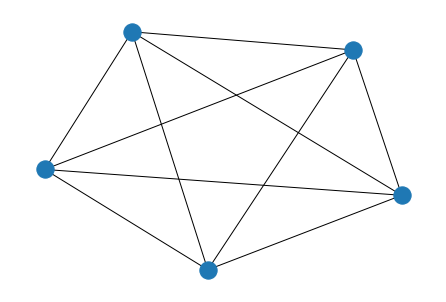

In [12]:
# Sanity check 
for g,p in zip(graphs, properties):
    nx.draw(g)
    print_properties(p)
    break

## HCS Algorithm 
#### Test graphs using HCS algorithm and analyze results

In [13]:
# Install dependency
# !pip install netgraph

In [14]:
from networkx.algorithms import community
from netgraph import Graph
import matplotlib.pyplot as plt
from hcs_module import HCS,labelled_HCS
import csvwriter as cvw

In [15]:
# Helper function to generate node-community dict for netgraph color function
def node_comm_dict(labels):
    out = dict()
    for (node, comm) in enumerate(labels):
        out[node] = comm
    return out


In [17]:
# Choose second graph in the array
G = graphs[2].copy()

In [18]:
# Check the HCS algorithm on a graph
HCS_G = HCS(G.copy())
labels, itr = labelled_HCS(G.copy())
node_to_community= node_comm_dict(labels)

cutratio = ev.cut_ratio(G,itr)
avg_internal_density= ev.avg_internal_density(G,itr)
coverage, performance = ev.cov_per(G,itr)
modularity = ev.modularity(G,itr)

print(extract_properties(properties[2]))
print(cutratio, avg_internal_density, coverage, performance, modularity)


[15, 64, 8.533333333333333, 0.6095238095238096]
0.45454545454545453 0 0.671875 0.6857142857142857 -0.021484375


### Default function to run all graphs and cluster them

In [19]:
import timeit
from IPython.display import clear_output, display
def evaluate_graphs(graphs):
    csvwriter= cvw.CustomCSV(cols=cvw.CustomCSV.ALL_HEADER)
    results = []
    for idx, graph in enumerate(graphs):
        print(idx)
        G = graph.copy()
        
        # Clustering algorithm start
        start = timeit.default_timer()
        itr = community.label_propagation_communities(G)
        exec_time = timeit.default_timer() - start
        # end
        #print(exec_time)
        cutratio = ev.cut_ratio(G,itr)
        modularity = ev.modularity(G,itr)
        avg_internal_density= ev.avg_internal_density(G,itr)
        coverage, performance = ev.cov_per(G,itr)
        node_to_community= node_comm_dict(labels)
         # Number of clusters
        num_clusters = len([*itr])
        props = extract_properties(properties[idx])
        results.append([*props,cutratio, avg_internal_density,coverage, performance, modularity,exec_time,num_clusters])
        clear_output(wait=True)
    csvwriter.write_to_csv(data=results,filename=csv_save_loc)

evaluate_graphs(graphs=graphs)

> Sucessfully written to ./csvs/LPA_chordal_graphs_first_50.picklenum-clusters ...


/global/scratch/saffat/miniconda3/envs/sage/lib/python3.10/site-packages/netgraph/_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


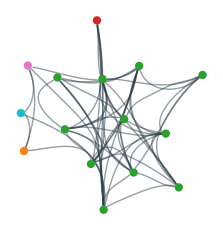

In [14]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink',
    5 : 'tab:cyan',
    6 : 'tab:olive',
    7 : 'tab:purple',
    8 : 'tab:brown'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [15]:
# Helper function to draw both original and clustered graphs
def plot_graph_and_cluster(G, node_color_dict, key="HCS"):
    '''
      Input:
      G = The original graph
      node_color_dict = The clustered graph node community dict
      key = The name of the clustering algorithm
      
      Output: 
      void 
    '''
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Original Graph and Clustered Graph using '+ key)
    
    # Draw original graph
    nx.draw(G, ax=ax1)
    
    # Draw clusterd graph
    Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled',
      ax=ax2
    )
    plt.show()

In [16]:
#plot_graph_and_cluster(G, node_color)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load csv file containing info
raw = pd.read_csv(f"./csvs/{csv_save_loc}.csv")
raw.head()

,Number of nodes,Number of Edges,Average Degree,Density,Cut-Ratio,Avg. internal density,Coverage,Performance,Modularity,Execution Time,Num of Clusters
0,5,10,4.000000,1.000000,0.0,1.000000,1.0,1.000000,0.0,0.000541,1
1,10,45,9.000000,1.000000,0.0,1.000000,1.0,1.000000,0.0,0.000419,1
2,15,64,8.533333,0.609524,0.0,0.609524,1.0,0.609524,0.0,0.000543,1
3,20,164,16.400000,0.863158,0.0,0.863158,1.0,0.863158,0.0,0.000952,1
4,25,208,16.640000,0.693333,0.0,0.693333,1.0,0.693333,0.0,0.000657,1


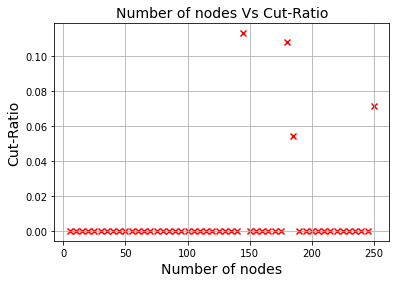

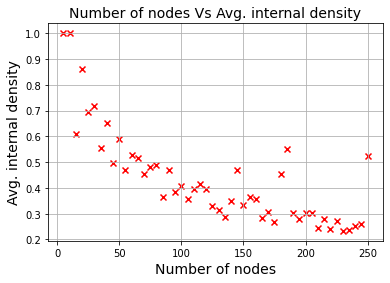

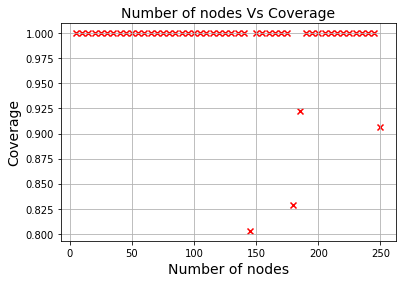

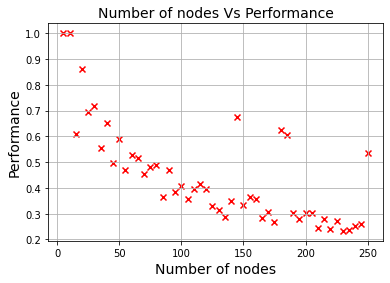

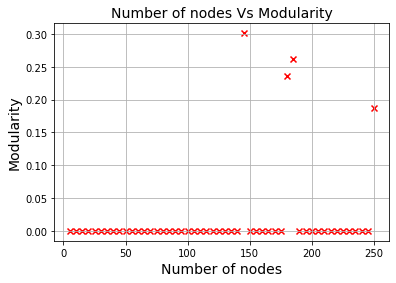

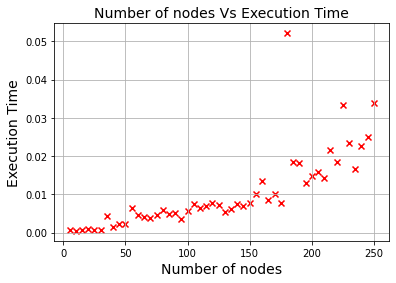

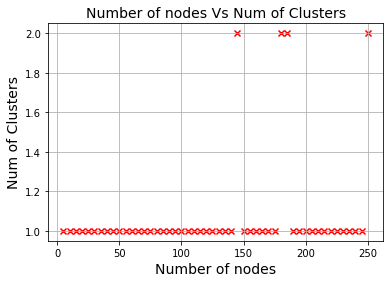

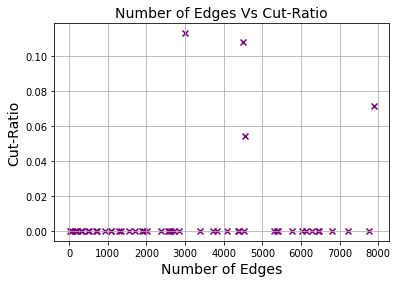

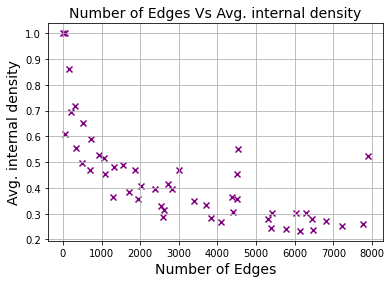

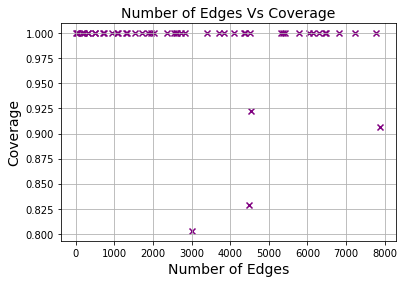

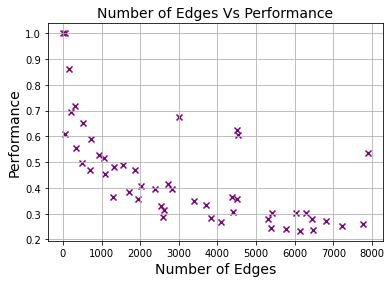

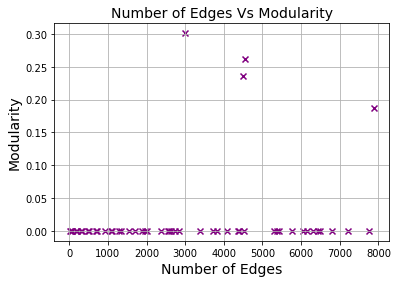

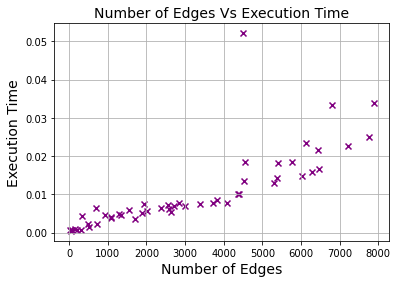

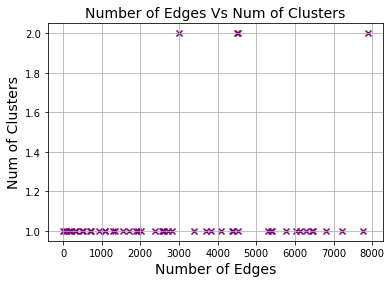

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Visualization for HCS algorithm
# Load csv file containing info
PERFOMANCE_METRICS = cvw.CustomCSV.PERFOMANCE_METRICS

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot node vs density
    plt.figure()
    plt.scatter(raw["Number of nodes"],raw[metric], color='red', marker='x')
    plt.title(f'Number of nodes Vs {metric}', fontsize=14)
    plt.xlabel('Number of nodes', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot edges vs density
    plt.figure()
    plt.scatter(raw["Number of Edges"],raw[metric], color='purple', marker='x')
    plt.title(f'Number of Edges Vs {metric}', fontsize=14)
    plt.xlabel('Number of Edges', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()